### Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

### Importing Dataset and performing feature scaling

In [27]:
data = pd.read_csv('threats.csv')
data = data.dropna(subset=[data.columns[-1]])
X, y = data.drop('Threat', axis=1).values, data.Threat.values
print(type(X))
X = X.astype(int)
y = y.astype(int)
scaler = StandardScaler()
X = scaler.fit_transform(X)

<class 'numpy.ndarray'>


### Implementing RFE to remove weakest features

In [28]:
estimator = DecisionTreeClassifier()
rfe = RFE(estimator=estimator, n_features_to_select=15)
X_rfe = rfe.fit_transform(X, y)

### Balancing dataset by oversampling minority feature to prevent oversampling

In [29]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_rfe, y)

### Splitting data into test and train sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=0)

### Visualising the model as a tree

In [31]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(tree.export_text(clf))

|--- feature_0 <= 0.44
|   |--- feature_0 <= 0.06
|   |   |--- feature_0 <= 0.06
|   |   |   |--- feature_0 <= -0.33
|   |   |   |   |--- feature_0 <= -0.33
|   |   |   |   |   |--- feature_0 <= -0.72
|   |   |   |   |   |   |--- feature_0 <= -0.72
|   |   |   |   |   |   |   |--- feature_0 <= -1.10
|   |   |   |   |   |   |   |   |--- feature_0 <= -1.10
|   |   |   |   |   |   |   |   |   |--- feature_0 <= -1.49
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= -1.49
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 45
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  -1.49
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 30
|   |   |   |   |   |   |   |   |   |--- feature_0 >  -1.49
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  -1.10
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 2.05
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= -0.02
|   | 

### Visualising the Data trees using Matplotlib

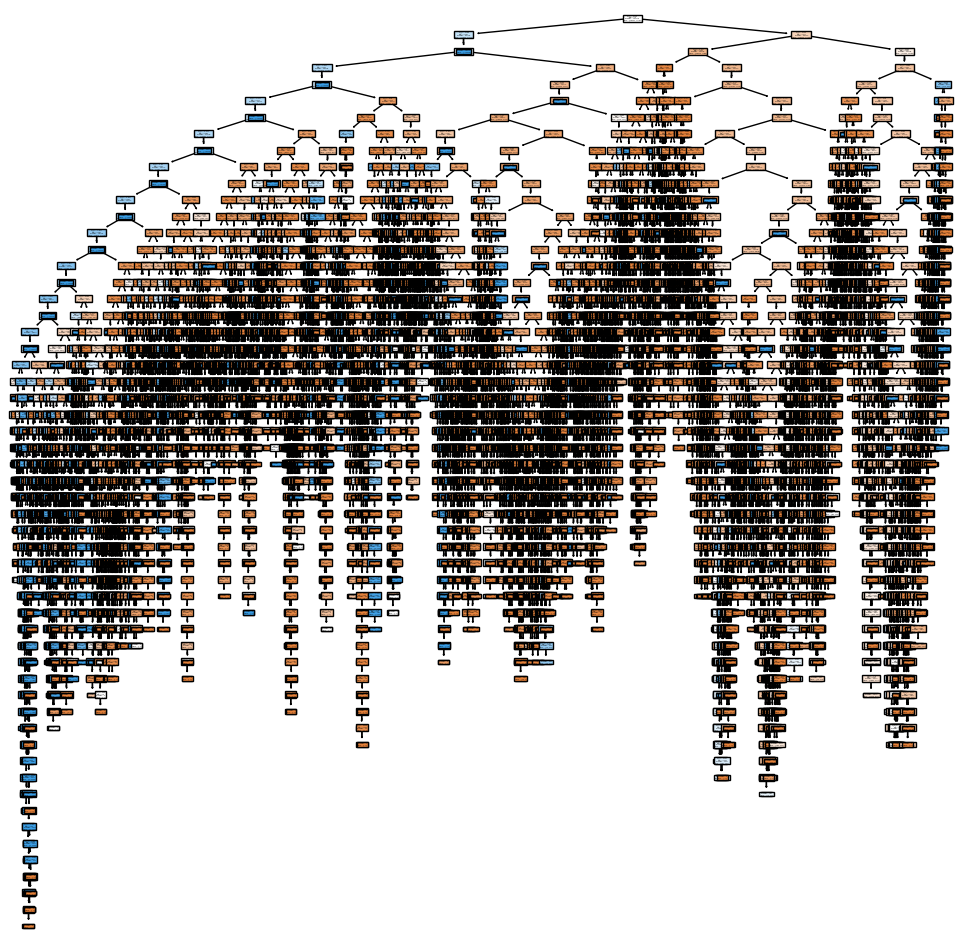

In [32]:
fig, ax = plt.subplots(figsize=(12,12))
_ = tree.plot_tree(clf, ax=ax, filled=True)